In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style = "darkgrid")
sns.set_context("paper")

plt.figure(figsize=(8,6))
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<Figure size 576x432 with 0 Axes>

In [3]:
import opendatasets as od
import os
dataset_url = "https://www.kaggle.com/blurredmachine/are-your-employees-burning-out"
od.download(dataset_url)

data_dir = os.listdir()[1]
file_list = os.listdir("./are-your-employees-burning-out")
print(file_list)


Skipping, found downloaded files in ".\are-your-employees-burning-out" (use force=True to force download)
['sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
file_path = "./are-your-employees-burning-out/" + "train.csv"
raw_employee_df = pd.read_csv(file_path)
print(raw_employee_df)

                    Employee ID Date of Joining  Gender Company Type WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  Burn Rate
0      fffe32003000360033003200      2008-09-30  Female      Service                  No          2.0                  3.0                   3.8       0.16
1          fffe3700360033003500      2008-11-30    Male      Service                 Yes          1.0                  2.0                   5.0       0.36
2      fffe31003300320037003900      2008-03-10  Female      Product                 Yes          2.0                  NaN                   5.8       0.49
3      fffe32003400380032003900      2008-11-03    Male      Service                 Yes          1.0                  1.0                   2.6       0.20
4      fffe31003900340031003600      2008-07-24  Female      Service                  No          3.0                  7.0                   6.9       0.52
...                         ...             ...     ...         

In [5]:
raw_employee_df = raw_employee_df.drop("Employee ID", axis = 1)
print(raw_employee_df)

      Date of Joining  Gender Company Type WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  Burn Rate
0          2008-09-30  Female      Service                  No          2.0                  3.0                   3.8       0.16
1          2008-11-30    Male      Service                 Yes          1.0                  2.0                   5.0       0.36
2          2008-03-10  Female      Product                 Yes          2.0                  NaN                   5.8       0.49
3          2008-11-03    Male      Service                 Yes          1.0                  1.0                   2.6       0.20
4          2008-07-24  Female      Service                  No          3.0                  7.0                   6.9       0.52
...               ...     ...          ...                 ...          ...                  ...                   ...        ...
22745      2008-12-30  Female      Service                  No          1.0               

In [6]:
raw_employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  float64
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


In [7]:
raw_employee_df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


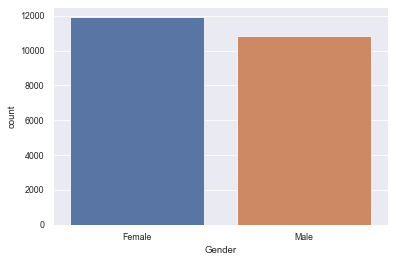

In [8]:
sns.countplot(x = "Gender", data = raw_employee_df);

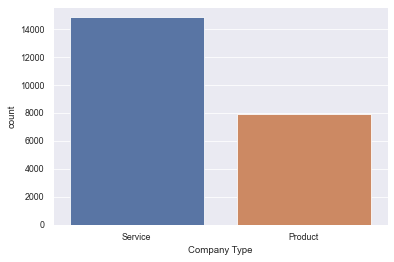

In [9]:
sns.countplot(x = "Company Type", data = raw_employee_df);

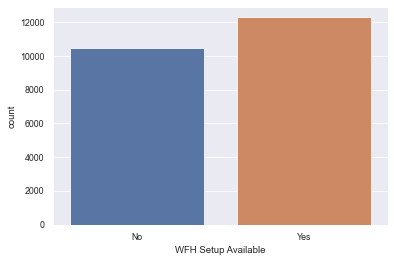

In [10]:
sns.countplot(x = "WFH Setup Available", data = raw_employee_df);

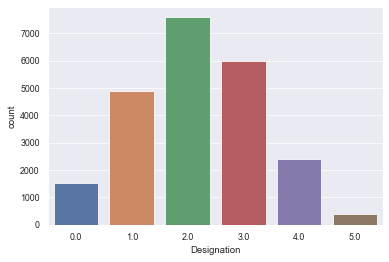

In [11]:
sns.countplot(x = "Designation", data = raw_employee_df);

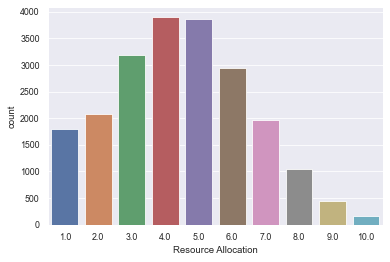

In [12]:
sns.countplot(x = "Resource Allocation", data = raw_employee_df);

In [13]:
print(raw_employee_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  float64
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB
None


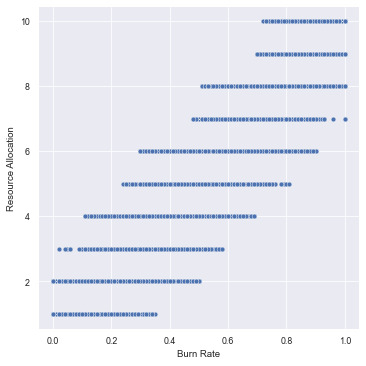

In [14]:
sns.relplot(x = "Burn Rate", y = "Resource Allocation", data = raw_employee_df) ;

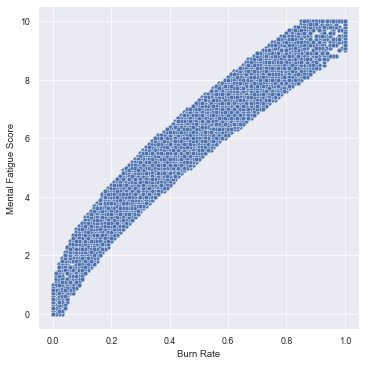

In [15]:
sns.relplot(x = "Burn Rate", y = "Mental Fatigue Score", data = raw_employee_df) ;

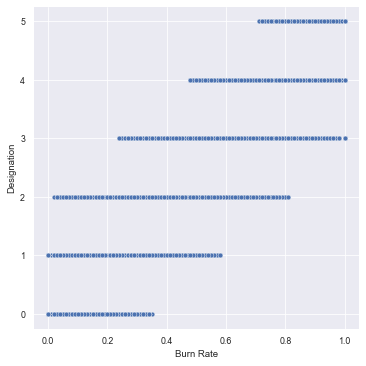

In [16]:
sns.relplot(x = "Burn Rate", y = "Designation", data = raw_employee_df) ;

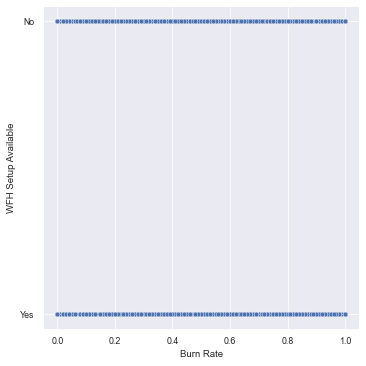

In [17]:
sns.relplot(x = "Burn Rate", y = "WFH Setup Available", data = raw_employee_df) ;

In [18]:
raw_employee_df.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.878459,0.690983,0.737556
Resource Allocation,0.878459,1.000000,0.799662,0.856278
Mental Fatigue Score,0.690983,0.799662,1.000000,0.944546
Burn Rate,0.737556,0.856278,0.944546,1.000000


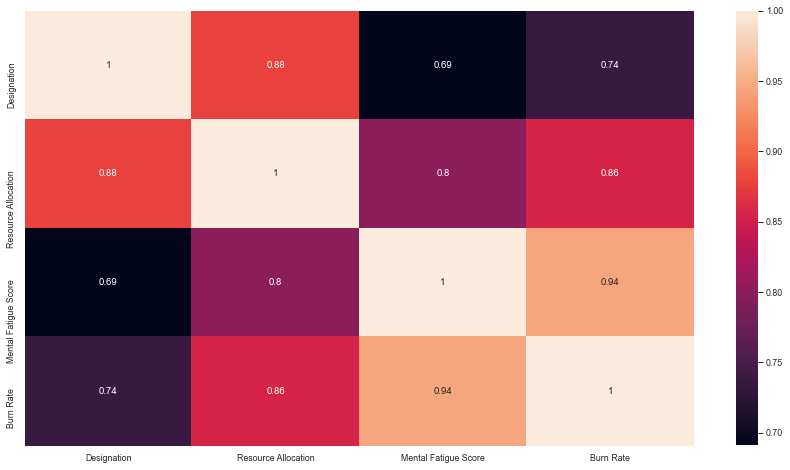

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(raw_employee_df.corr(), annot=True);

In [20]:
#How many employees are extreamly burned out (having burn rate greater than 0.7 ?
extream_burn_rate_df = raw_employee_df[raw_employee_df["Burn Rate"] >= 0.7]
extreamly_burned_out_count = extream_burn_rate_df["Burn Rate"].count()
print("Number of employees who are extreamly burned out =", extreamly_burned_out_count)

percent = extreamly_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under Extreamly burned out = " , percent * 100, " %")

Number of employees who are extreamly burned out = 2403
Percentage of exmployees who fall under Extreamly burned out =  10.562637362637362  %


In [21]:
#How many employees are moderately burned out (having burn rate greater than 0.5 and less thatn 0.7) ?
moderate_burn_rate_df = raw_employee_df[(raw_employee_df["Burn Rate"] >= 0.5) & (raw_employee_df["Burn Rate"] < 0.7)]
moderately_burned_out_count = moderate_burn_rate_df["Burn Rate"].count()
print("Number of employees who are moderately burned out =", moderately_burned_out_count)

percent = moderately_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under Moderately burned out = " , percent * 100, " %")

Number of employees who are moderately burned out = 6625
Percentage of exmployees who fall under Moderately burned out =  29.120879120879124  %


In [22]:
#How many employees are moderately burned out (having burn rate greater than 0.5 and less thatn 0.7) ?
slightly_burn_rate_df = raw_employee_df[(raw_employee_df["Burn Rate"] > 0.0) & (raw_employee_df["Burn Rate"] < 0.5)]
slightly_burned_out_count = slightly_burn_rate_df["Burn Rate"].count()
print("Number of employees who are slightly burned out =", slightly_burned_out_count)

percent = slightly_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under Slightly burned out = " , percent * 100, " %")

Number of employees who are slightly burned out = 12326
Percentage of exmployees who fall under Slightly burned out =  54.18021978021979  %


In [23]:
#How many employees are not burned out at all ?
no_burn_rate_df = raw_employee_df[raw_employee_df["Burn Rate"] == 0]
no_burned_out_count = no_burn_rate_df["Burn Rate"].count()
print("Number of employees who are not burned out =", no_burned_out_count)

percent = no_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under No burned out = " , percent * 100, " %")

Number of employees who are not burned out = 272
Percentage of exmployees who fall under No burned out =  1.1956043956043956  %


In [24]:
raw_employee_df['Burnout Category'] = np.where(
    raw_employee_df['Burn Rate'] > 0.7, "Extreme", #Else below
    np.where((raw_employee_df["Burn Rate"] >= 0.5) & (raw_employee_df["Burn Rate"] < 0.7), "Moderate", #else below
    np.where(raw_employee_df['Burn Rate'] < 0.5, "Slight", "No Burnout"  )))

In [25]:
males_count_extreme = raw_employee_df[(raw_employee_df['Burnout Category'] == "Extreme") & ((raw_employee_df['Gender'] == "Male"))]['Burnout Category'].count()
males_count_moderate = raw_employee_df[(raw_employee_df['Burnout Category'] == "Moderate") & ((raw_employee_df['Gender'] == "Male"))]['Burnout Category'].count()
males_count_slight = raw_employee_df[(raw_employee_df['Burnout Category'] == "Slight") & ((raw_employee_df['Gender'] == "Male"))]['Burnout Category'].count()

print("Number of males with Extreme Burnout = ", males_count_extreme)
print("Number of males with Moderate Burnout = ", males_count_moderate)
print("Number of males with Slight Burnout = ", males_count_slight)

Number of males with Extreme Burnout =  1300
Number of males with Moderate Burnout =  3865
Number of males with Slight Burnout =  4992


In [26]:
females_count_extreme = raw_employee_df[(raw_employee_df['Burnout Category'] == "Extreme") & ((raw_employee_df['Gender'] == "Female"))]['Burnout Category'].count()
females_count_moderate = raw_employee_df[(raw_employee_df['Burnout Category'] == "Moderate") & ((raw_employee_df['Gender'] == "Female"))]['Burnout Category'].count()
females_count_slight = raw_employee_df[(raw_employee_df['Burnout Category'] == "Slight") & ((raw_employee_df['Gender'] == "Female"))]['Burnout Category'].count()

print("Number of females with Extreme Burnout = ", females_count_extreme)
print("Number of females with Moderate Burnout = ", females_count_moderate)
print("Number of females with Slight Burnout = ", females_count_slight)

Number of females with Extreme Burnout =  898
Number of females with Moderate Burnout =  2760
Number of females with Slight Burnout =  7606


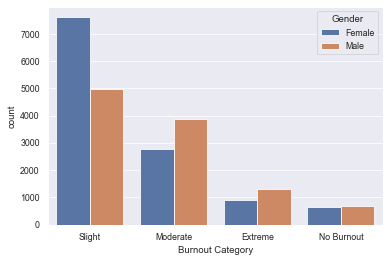

In [27]:
sns.countplot(x = "Burnout Category", data = raw_employee_df, hue = "Gender");

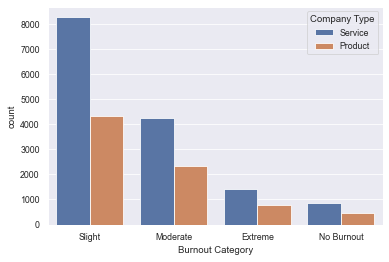

In [28]:
sns.countplot(x = "Burnout Category", data = raw_employee_df, hue = "Company Type");

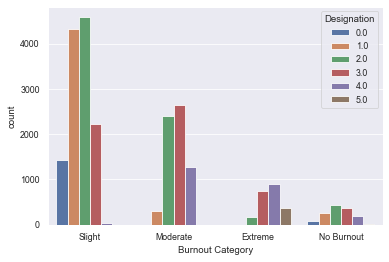

In [29]:
sns.countplot(x = "Burnout Category", data = raw_employee_df, hue = "Designation");

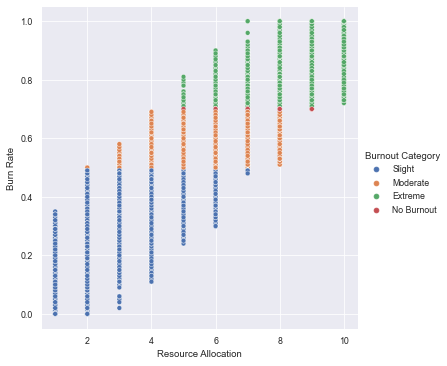

In [30]:
sns.relplot(x = "Resource Allocation", y = "Burn Rate", data = raw_employee_df, hue = "Burnout Category");